Name : Janhavi Sachin Phulavare




**Task 1: Credit Card Fraud Detection**

# Importing Libraries

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,classification_report,roc_auc_score, roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score

In [2]:
data=pd.read_csv('/content/drive/MyDrive/creditcarddata.csv')

In [3]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Exploratory Data Analysis

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Target Variable is Class.

0 : Not Fraud
1 : Fraud

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

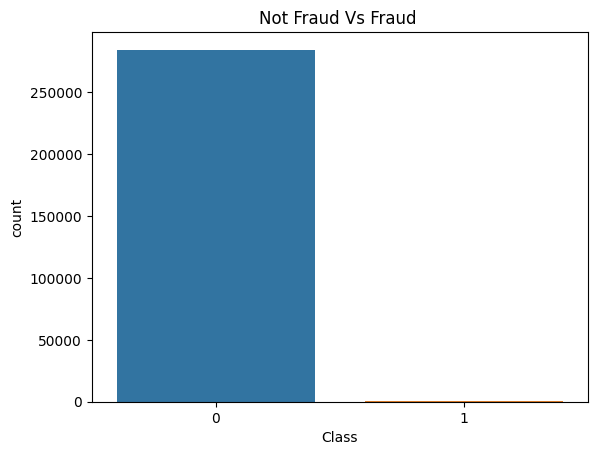

In [10]:
sns.countplot(x='Class', data=data)
plt.title('Not Fraud Vs Fraud ')
plt.show()

Here, the data is highly imbalanced as there are very less Fraud transactions.

<ipython-input-11-645911568fde>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Time'])


<Axes: xlabel='Time', ylabel='Density'>

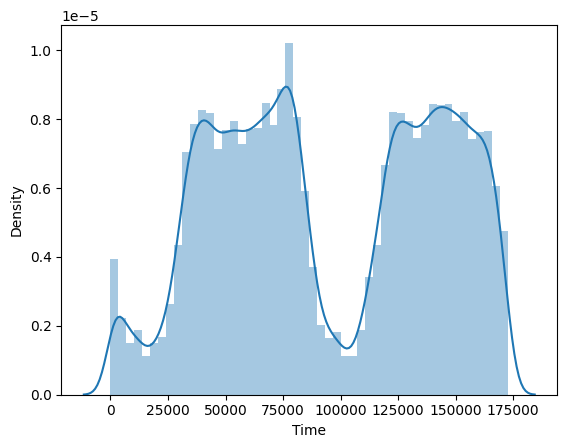

In [11]:
sns.distplot(data['Time'])

<ipython-input-12-722483dc680a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

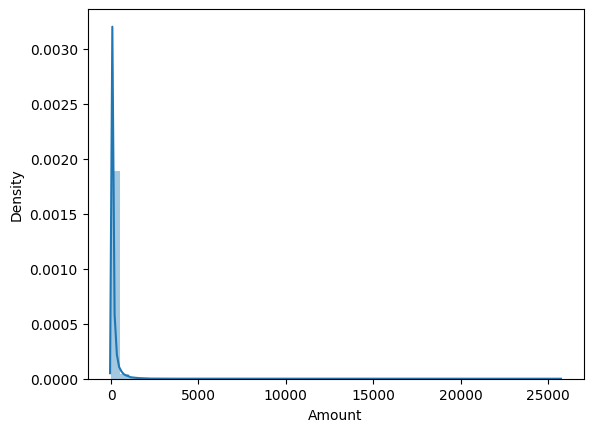

In [12]:
sns.distplot(data['Amount'])

Text(0.5, 1.0, 'Correlation Heatmap')

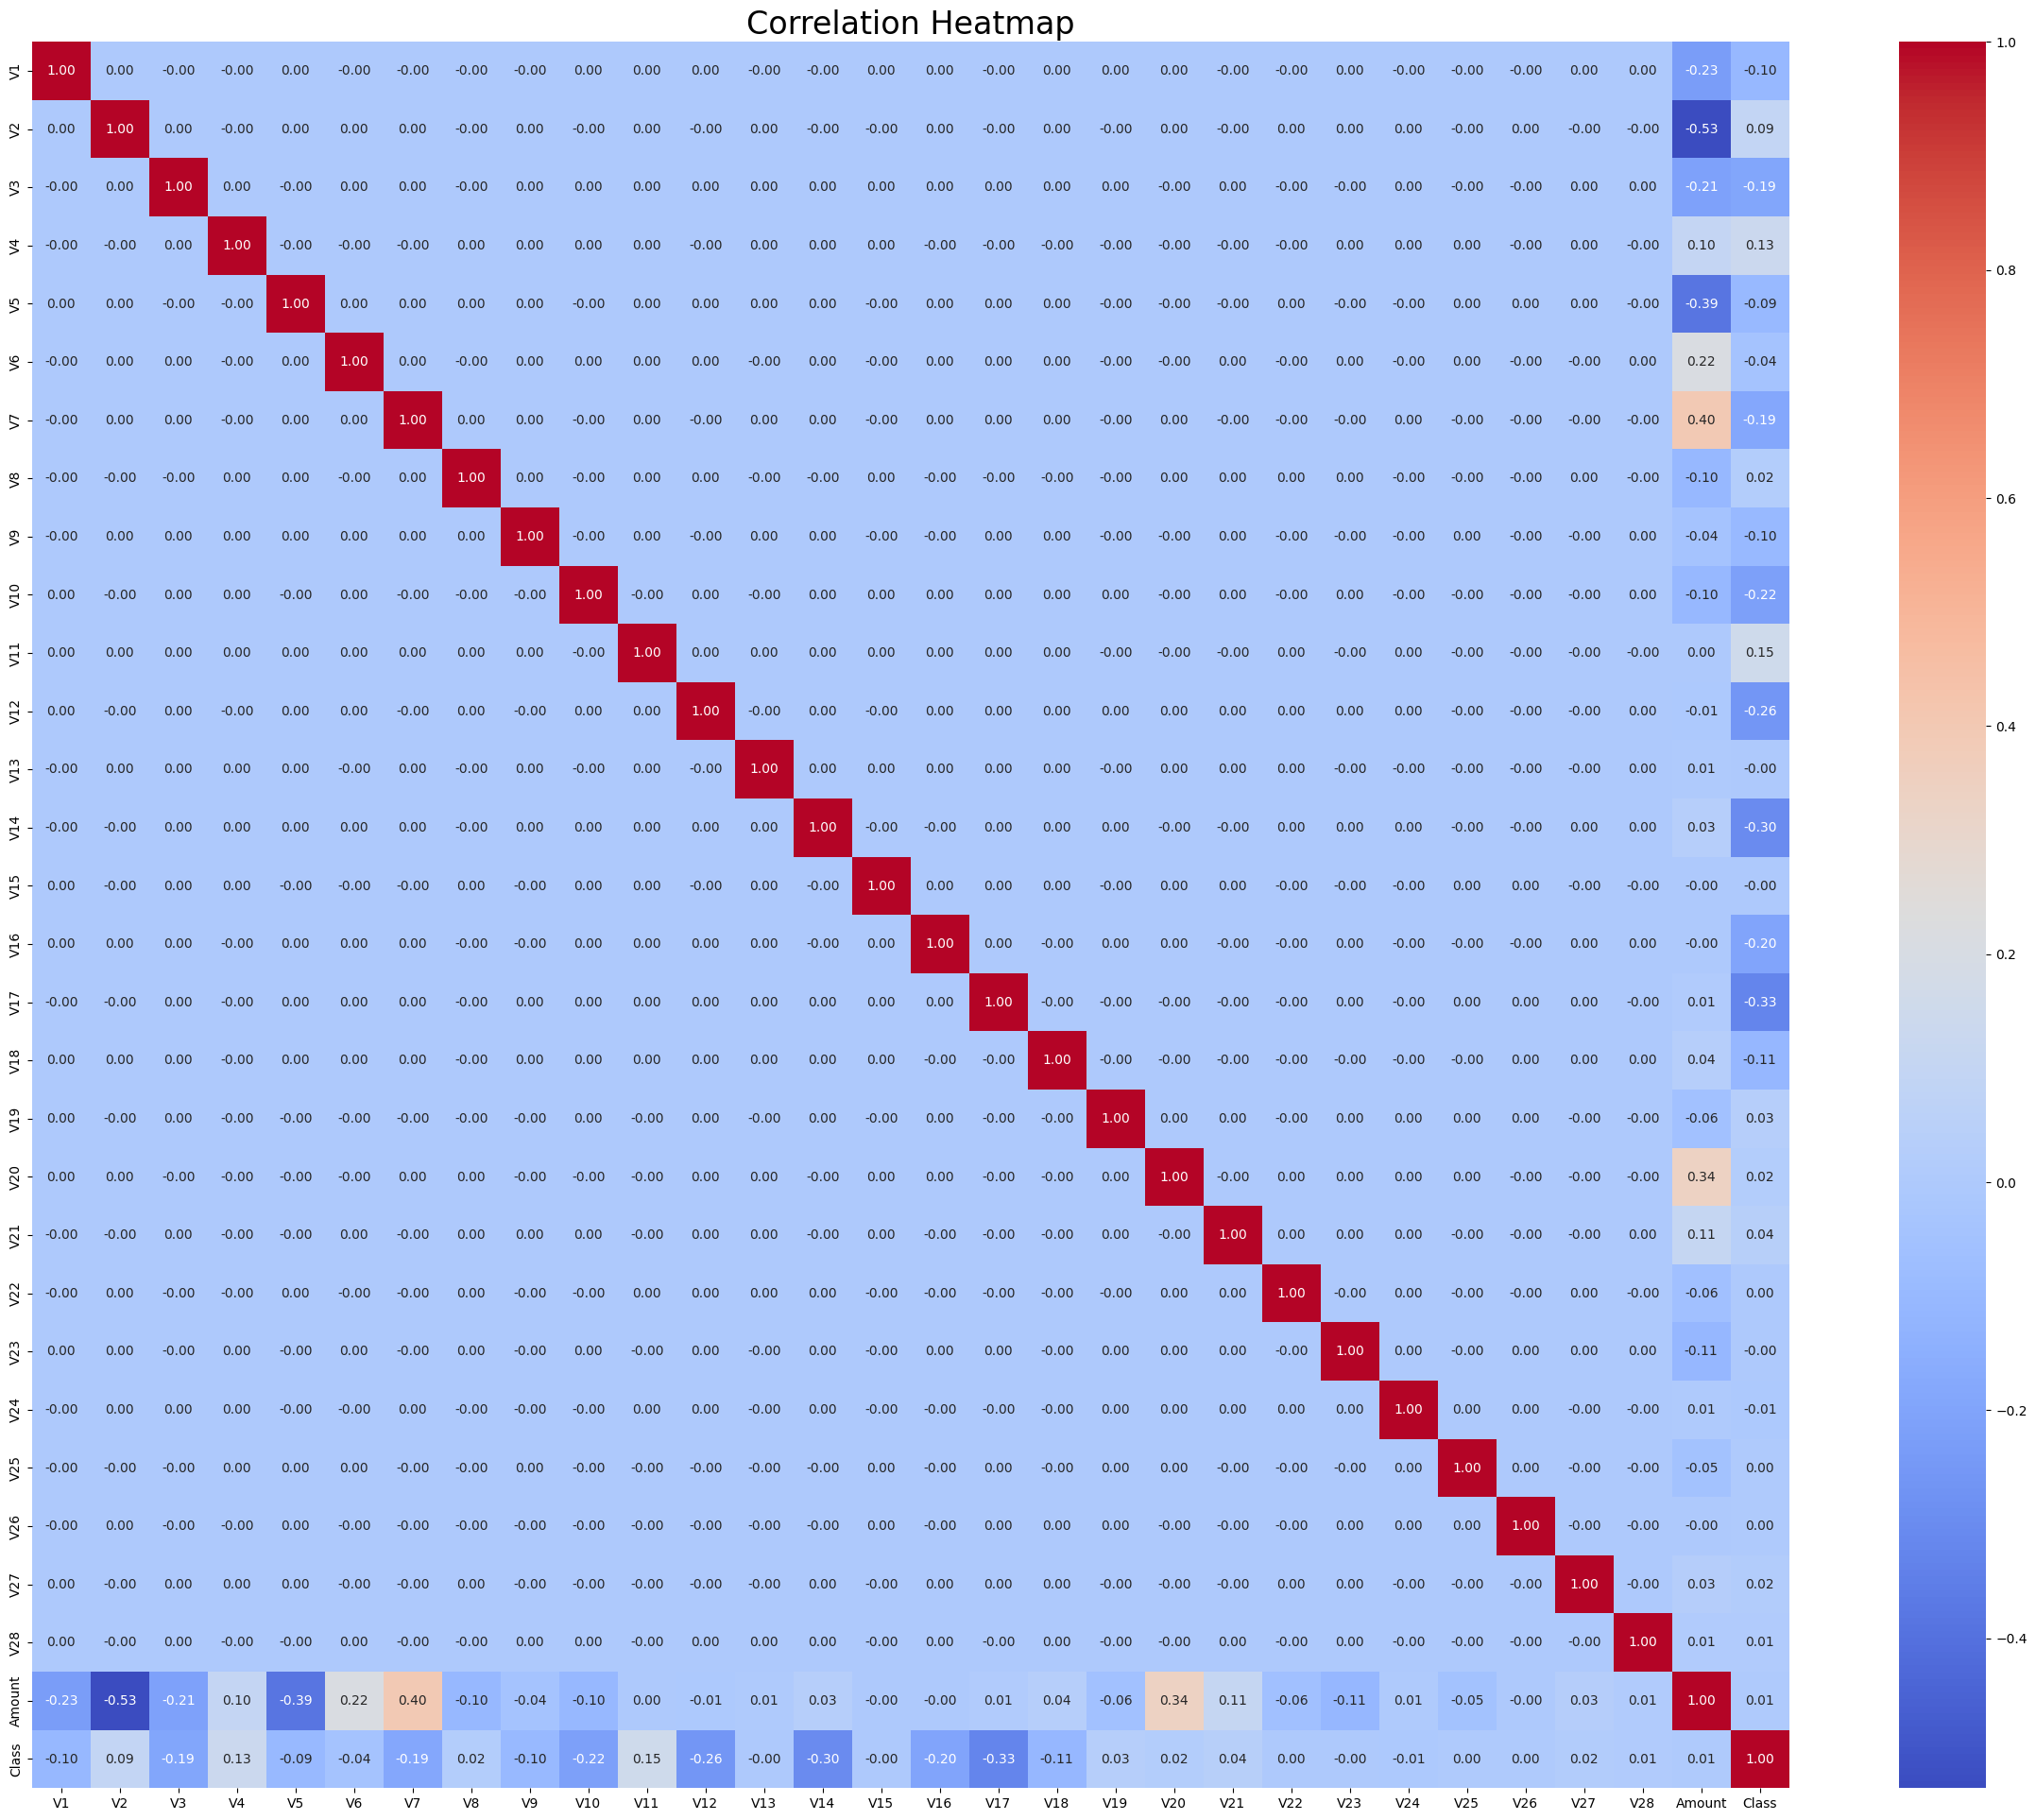

In [44]:
corr = data.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=24)

Using Standard Scaler to scale the Amount column.

In [13]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [14]:
data=data.drop(['Time'],axis=1)

In [15]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# Spliting Data into input and target variables.

In [16]:
X=data.drop(['Class'],axis=1)

In [17]:
Y=data['Class']

In [18]:
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

As the target Class is highly unbalanced. We need to balance the data.


So using OverSampling technique Using SMOTE.

In [19]:
sm = SMOTE()
X_sm, Y_sm = sm.fit_resample(X, Y)

In [35]:
df=pd.DataFrame(X_sm)

In [36]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-19.913835,12.119608,-22.510444,6.118020,-15.185435,-4.349905,-15.673192,13.312488,-3.971971,-8.853280,...,1.583694,1.751037,-1.414437,-0.813862,0.121774,1.354739,-0.224244,1.595660,0.476252,0.046539
568626,0.573675,3.292979,-6.583120,6.368423,-0.037756,-2.339356,-2.786136,0.524791,-3.536012,-5.296342,...,0.555596,0.596799,-0.400345,-0.169731,-0.549953,0.620203,0.227246,0.897676,0.470669,-0.333976
568627,1.225810,1.182749,-1.854772,2.072627,0.938900,-0.935167,0.234355,0.100672,0.208202,-2.073700,...,-0.151365,-0.349777,-0.773802,-0.097107,-0.191914,0.535179,-0.373735,0.078709,0.107336,-0.349231
568628,-0.105844,3.746885,-6.378867,5.941864,0.583300,-2.312345,-2.268497,0.561346,-3.747461,-5.729582,...,0.545512,0.524402,-0.606077,-0.261698,-0.397518,0.486798,0.164428,0.879644,0.497809,-0.342266


Text(0.5, 1.0, 'Not Fraud Vs Fraud ')

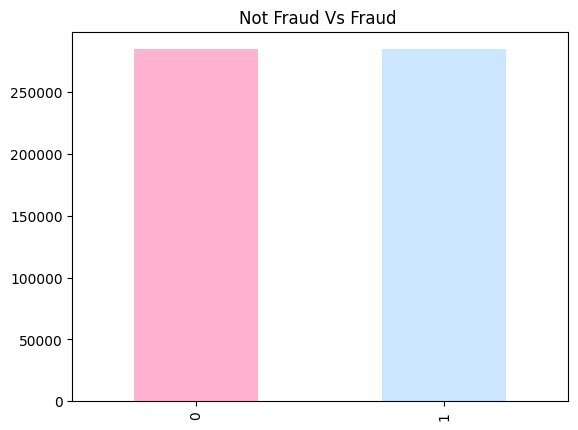

In [20]:
Y_sm.value_counts().plot(kind='bar',color=['#ffb3d1','#cce6ff'])
plt.title('Not Fraud Vs Fraud ')

In [21]:
Y_sm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

Now, the data is balanced.

With equal records of Fraud and Non Fraud transactions.

# Spliting the Data into Training and Testing Data

In [22]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X_sm,Y_sm,test_size=0.3,random_state=42,stratify=Y_sm)

In [23]:
print(X_Train.shape,X_Test.shape,Y_Train.shape,Y_Test.shape)

(398041, 29) (170589, 29) (398041,) (170589,)


# Model Training and Evaluation :

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_Train,Y_Train)
dt_y_pred=dt.predict(X_Test)
print("Decision Tree:")
print(classification_report(Y_Test,dt_y_pred))
ac_dt=accuracy_score(Y_Test,dt_y_pred)
print("Accuracy Score:",ac_dt)

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Accuracy Score: 0.9980186295716605


In [25]:
lr=LogisticRegression()
lr.fit(X_Train,Y_Train)
lr_y_pred=lr.predict(X_Test)
print("Logistic Regression:")
print(classification_report(Y_Test,lr_y_pred))
ac_lr=accuracy_score(Y_Test,lr_y_pred)
print("Accuracy Score:",ac_lr)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85295
           1       0.97      0.92      0.94     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Accuracy Score: 0.9463798955383993


In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_Train, Y_Train)
xgb_y_pred=xgb.predict(X_Test)
print("XGBoost:")
print(classification_report(Y_Test,xgb_y_pred))
ac_xgb=accuracy_score(Y_Test,xgb_y_pred)
print("Accuracy Score:",ac_xgb)


XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Accuracy Score: 0.999718621951005


In [27]:
model_df=pd.DataFrame({'Model Name':['Decision Tree','Logistic Regression','XG Boost'],
                       'Accuracy Score':[ac_dt,ac_lr,ac_xgb]})

In [28]:
model_df.sort_values("Accuracy Score", ascending=False)

,Model Name,Accuracy Score
2,XG Boost,0.999719
0,Decision Tree,0.998019
1,Logistic Regression,0.946380


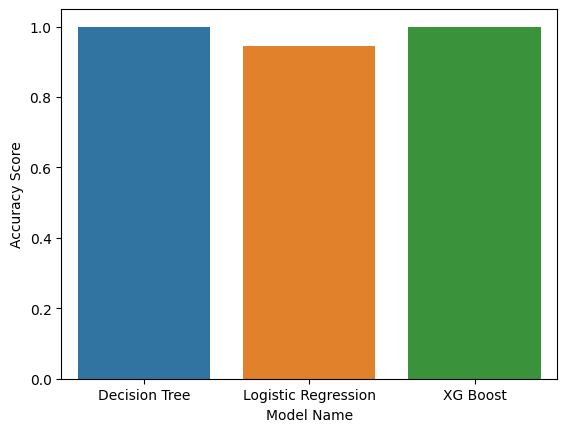

In [29]:
sns.barplot(x=model_df["Model Name"], y=model_df["Accuracy Score"])
#plt.xticks(rotation=90)
plt.show()

# XGBoost Has Highest Accuracy.

In [99]:
ClassificationReport = classification_report(Y_Test,xgb_y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [30]:
CM = confusion_matrix(Y_Test, xgb_y_pred)
print("confusion Matrix : \n", CM)

confusion Matrix : 
 [[85248    47]
 [    1 85293]]


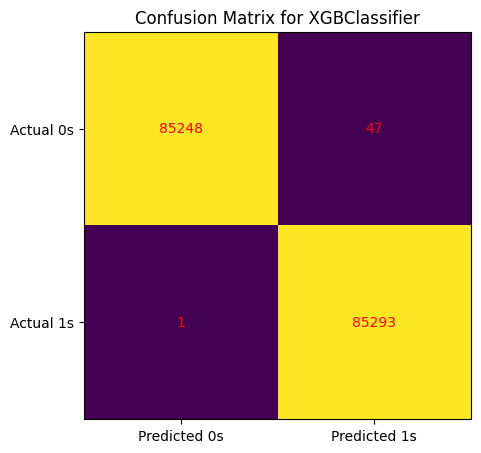

In [31]:
fig, ax = plt.subplots(figsize=(5, 8))
ax.imshow(CM)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, CM[i, j], ha='center', va='center', color='red')
plt.title("Confusion Matrix for XGBClassifier")
plt.show()

In [103]:
xgb_perc_score = precision_score(Y_Test, xgb_y_pred)
xgb_rec_score= recall_score(Y_Test, xgb_y_pred)
xgb_f1_score = f1_score(Y_Test, xgb_y_pred)

print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F1 Score: %.3f' % xgb_f1_score)

Precision: 0.999
Recall: 1.000
F1 Score: 1.000


In [104]:
y_pred_prob_lr = xgb.predict_proba(X_Test)[:, 1]
xgb_roc_auc_score = roc_auc_score(Y_Test, y_pred_prob_lr)
print('ROC AUC Score:', xgb_roc_auc_score)

ROC AUC Score: 0.9999911386040605


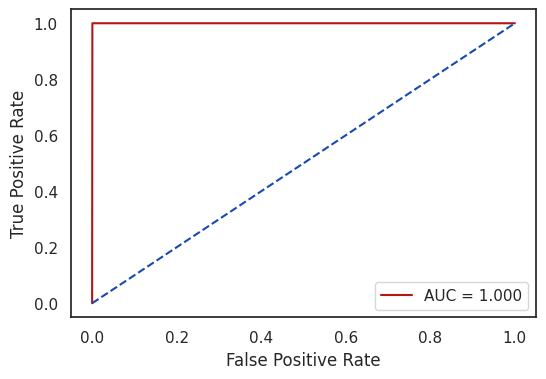

In [111]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_Test,xgb_y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 4))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [32]:
import pickle
pickle.dump(xgb, open('xgbmodel.pkl','wb'))

In [33]:
xgb_model = pickle.load(open('xgbmodel.pkl','rb'))

# Prediction

In [93]:
ip=(-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62)
ip_arr=np.asarray(ip)
ip_reshaped=ip_arr.reshape(1,-1)

prediction= xgb.predict(ip_reshaped)
print(prediction)

if(prediction[0]==0):
  print("Not Fraudulent Transaction")
else :
  print("Fradulent Transaction")

[0]
Not Fraudulent Transaction


In [94]:
ip=(-3.0435406239976,-3.15730712090228,1.08846277997285,2.2886436183814,1.35980512966107,-1.06482252298131,0.325574266158614,-0.0677936531906277,-0.270952836226548,-0.838586564582682,-0.414575448285725,-0.503140859566824,0.676501544635863,-1.69202893305906,2.00063483909015,0.666779695901966,0.599717413841732,1.72532100745514,0.283344830149495,2.10233879259444,0.661695924845707,0.435477208966341,1.37596574254306,-0.293803152734021,0.279798031841214,-0.145361714815161,-0.252773122530705,0.0357642251788156,529)
ip_arr=np.asarray(ip)
ip_reshaped=ip_arr.reshape(1,-1)

prediction= xgb.predict(ip_reshaped)
print(prediction)

if(prediction[0]==0):
  print("Not Fraudulent Transaction")
else :
  print("Fradulent Transaction")

[1]
Fradulent Transaction


In [95]:
ip=(-2.30334956758553,1.759247460267,-0.359744743330052,2.33024305053917,-0.821628328375422,-0.0757875706194599,0.562319782266954,-0.399146578487216,-0.238253367661746,-1.52541162656194,2.03291215755072,-6.56012429505962,0.0229373234890961,-1.47010153611197,-0.698826068579047,-2.28219382856251,-4.78183085597533,-2.61566494476124,-1.33444106667307,-0.430021867171611,-0.294166317554753,-0.932391057274991,0.172726295799422,-0.0873295379700724,-0.156114264651172,-0.542627889040196,0.0395659889264757,-0.153028796529788,239.93)
ip_arr=np.asarray(ip)
ip_reshaped=ip_arr.reshape(1,-1)

prediction= xgb.predict(ip_reshaped)
print(prediction)

if(prediction[0]==0):
  print("Not Fraudulent Transaction")
else :
  print("Fradulent Transaction")

[1]
Fradulent Transaction


In [96]:
ip=(-1.65352805332127,2.13157309721051,1.97716579631107,2.99060679481136,-0.397348701035486,1.73509245767809,-1.2050317207604,-1.69598575854842,0.625114821781907,0.102576881448807,-0.957477443593752,-2.01925059076338,2.95943031508032,0.99778127003132,-0.976983951151433,-0.0695549892587699,1.13889938907717,0.444281909996085,1.31618931360638,-0.293546494911822,1.9334067785259,-1.24955210052977,0.0338341378154961,-0.638437688677289,0.300744915399941,0.250025215572929,0.365140942421739,0.0760603062341599,18.98)
ip_arr=np.asarray(ip)
ip_reshaped=ip_arr.reshape(1,-1)

prediction= xgb.predict(ip_reshaped)
print(prediction)

if(prediction[0]==0):
  print("Not Fraudulent Transaction")
else :
  print("Fradulent Transaction")

[0]
Not Fraudulent Transaction
